# K-Means Clustering

### Table of contents

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
%matplotlib inline

Read in normalised data

In [2]:
df = pd.read_csv('data/normalise.csv')
df=df.drop(["Unnamed: 0"], axis=1) # Drop Unnamed: 0 column
df.head()

,Total,Study_Type,No_participants,Amount_won,Amount_lost,1,2,3,4
0,1.044988,-1.607073,-0.698836,-1.471413,1.525683,-0.477115,-1.386904,-1.089197,2.131753
1,-0.414346,-1.607073,-0.698836,-0.538613,0.135451,1.024186,-0.420182,-0.668854,0.038743
2,-0.474318,-1.607073,-0.698836,-0.635110,0.167288,-0.477115,0.091612,-0.762264,0.314139
3,-0.294400,-1.607073,-0.698836,-0.699441,0.305250,-0.602224,0.034746,-0.668854,0.314139
4,0.205371,-1.607073,-0.698836,-1.053262,0.804036,-0.727332,-0.533914,-0.528740,0.754773


In [3]:
df.head()

,Total,Study_Type,No_participants,Amount_won,Amount_lost,1,2,3,4
0,1.044988,-1.607073,-0.698836,-1.471413,1.525683,-0.477115,-1.386904,-1.089197,2.131753
1,-0.414346,-1.607073,-0.698836,-0.538613,0.135451,1.024186,-0.420182,-0.668854,0.038743
2,-0.474318,-1.607073,-0.698836,-0.635110,0.167288,-0.477115,0.091612,-0.762264,0.314139
3,-0.294400,-1.607073,-0.698836,-0.699441,0.305250,-0.602224,0.034746,-0.668854,0.314139
4,0.205371,-1.607073,-0.698836,-1.053262,0.804036,-0.727332,-0.533914,-0.528740,0.754773


:::{note}
This correlation matrix is used to find highly correlated variables
:::

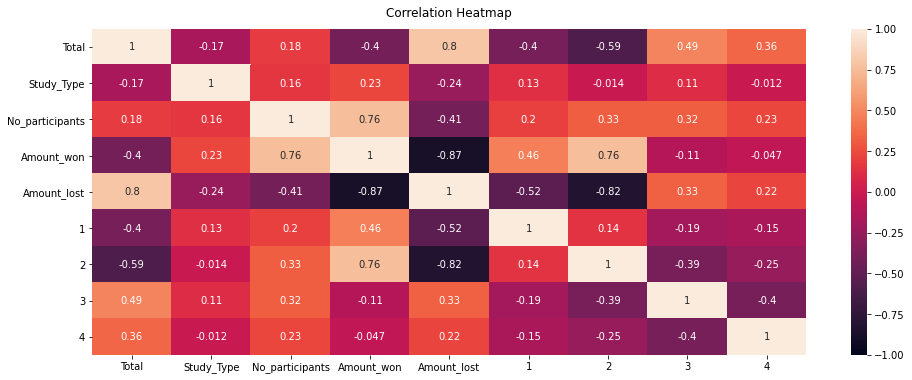

In [4]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### PCA

To avoid the curse of dimensionality. The curse of dimensionality is the problem caused by the exponential increase in volume associated with adding extra dimensions to Euclidean space. To avoid this we can perform Principal Component analysis (PCA) to our data frame. This will leave use with an array of components.

PCA is believed to imporve the performance for cluster analysis

For the purpose of this assignment I will select 2 features to be used for clustering

In [5]:
pca = PCA(2)
df_tester = pca.fit_transform(df)

In [6]:
df_tester

array([[-2.98565138, -0.90534442],
       [-0.2845081 , -1.42223416],
       [-0.54699829, -1.50399143],
       ...,
       [-0.20959764,  3.05643034],
       [ 0.99635261,  3.05873358],
       [ 5.87050839,  1.25408754]])

The newly optained PCA scores will be incorporated in the the K-means algorithm

The next step of the clustering process is to determine a value for K. This can be done by:<br />
* **The Elbow Method**
* **Silhouette score**

These two methods will be used to find the best value for K to use for clustering

### Methods for finding K Value

In [7]:
# Elbow(distortion and inertia) method and silhouette method

When the distortions are plotted and the plot looks like an arm then the [“elbow”](https://predictivehacks.com/k-means-elbow-method-code-for-python/)(the point of inflection on the curve) is the best value of k.

The formula for the Elbow method can be seen here: <br />
$$
    Sum Squared Errors = \sum_{i=1}^{N} {(y_i - ŷ_i)^2}
$$

The formula for the Silhouette Score method can be seen here: <br />
$$
    s_{i} = \frac{b_{i} - a_{i}}{max(b_{i}, a_{i})}
$$

In [8]:
wcss=[]
for i in range(1,21):
    k_means_pca=KMeans(n_clusters=i, init="k-means++", random_state=42)
    k_means_pca.fit(df_tester)
    wcss.append(k_means_pca.inertia_)

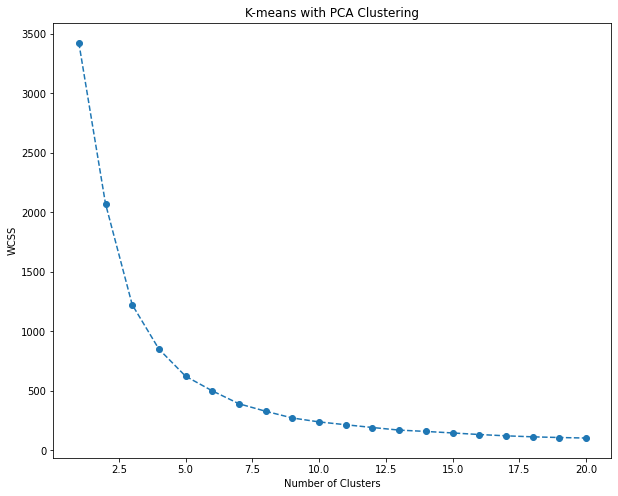

In [9]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means with PCA Clustering")
plt.show()

In [10]:
for n in range(2, 21):
    km = KMeans(n_clusters=n)
    km.fit_predict(df_tester)
    score = silhouette_score(df, km.labels_, metric='euclidean')
    print('N = ' + str(n) + ' Silhouette Score: %.3f' % score)

N = 2 Silhouette Score: 0.258
N = 3 Silhouette Score: 0.263


N = 4 Silhouette Score: 0.261


N = 5 Silhouette Score: 0.188
N = 6 Silhouette Score: 0.187


N = 7 Silhouette Score: 0.155


N = 8 Silhouette Score: 0.157


N = 9 Silhouette Score: 0.132


N = 10 Silhouette Score: 0.105


N = 11 Silhouette Score: 0.100


N = 12 Silhouette Score: 0.080


N = 13 Silhouette Score: 0.079


N = 14 Silhouette Score: 0.070


N = 15 Silhouette Score: 0.053


N = 16 Silhouette Score: 0.058


N = 17 Silhouette Score: 0.072


N = 18 Silhouette Score: 0.066


N = 19 Silhouette Score: 0.062


N = 20 Silhouette Score: 0.057


From looking at the Elbow blot and 


The formula for the Elbow method can be seen here: <br />
$$
    s_{i} = \frac{b_{i} - a_{i}}{max(b_{i}, a_{i})}
$$

From the various methods above the optimal value for K to bus used for clustering will be 4